SCENARIO 2:  
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data. 

Dataset (Kaggle – Public): 
https://www.kaggle.com/datasets/debashis74017/lic-stock-price-data 

In [1]:
# Karthick 24BAD055

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc


In [4]:
#Load the dataset 
df_stock = pd.read_csv("LICI_Daily_data.csv")
df_stock.head()

,Date,Open,High,Low,Close
0,Tue May 17 2022 00:00:00 GMT+0530 (India Stand...,872.00,918.95,860.00,875.25
1,Wed May 18 2022 00:00:00 GMT+0530 (India Stand...,885.55,891.00,874.10,876.35
2,Thu May 19 2022 00:00:00 GMT+0530 (India Stand...,867.00,867.00,838.00,840.85
3,Fri May 20 2022 00:00:00 GMT+0530 (India Stand...,848.55,856.80,825.00,826.15
4,Mon May 23 2022 00:00:00 GMT+0530 (India Stand...,826.15,852.70,803.65,816.85


In [5]:
#Create target value
df_stock["Price_Movement"] = np.where(
    df_stock["Close"] > df_stock["Open"], 1, 0
)

In [7]:
#Select features 
features = ["Open", "High", "Low"]
X = df_stock[features]
y = df_stock["Price_Movement"]


In [8]:
#Handle missing values
X.fillna(X.mean(), inplace=True)


,Open,High,Low
0,872.00,918.95,860.00
1,885.55,891.00,874.10
2,867.00,867.00,838.00
3,848.55,856.80,825.00
4,826.15,852.70,803.65
...,...,...,...
93,627.75,627.75,620.25
94,623.90,626.90,618.00
95,620.25,626.40,617.00
96,622.00,625.00,619.25


In [9]:
#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [11]:
#Train logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]


In [12]:
#Evaluation metrices
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


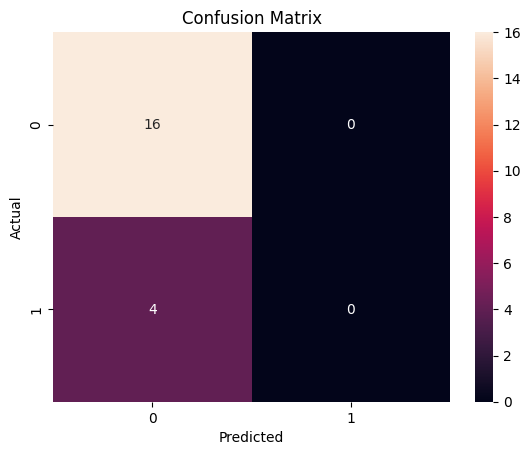

In [13]:
#Confustion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


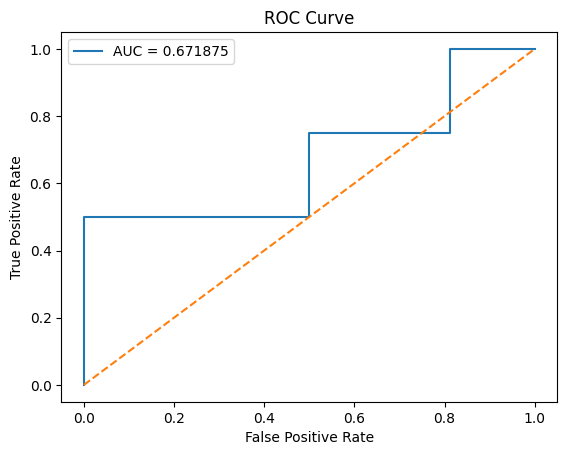

In [14]:
#ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="AUC = " + str(roc_auc))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


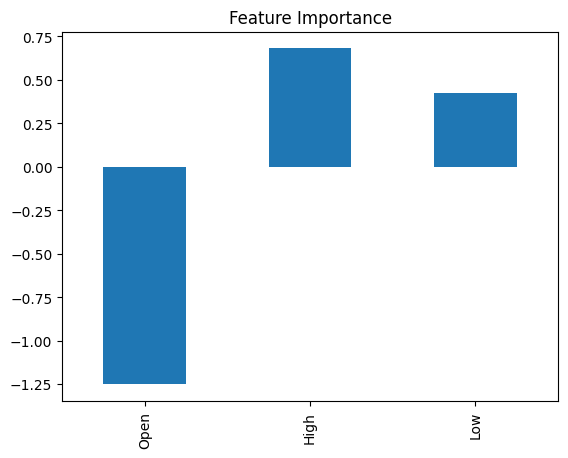

In [15]:
#Feature importance
importance = pd.Series(log_model.coef_[0], index=features)
importance.plot(kind="bar")
plt.title("Feature Importance")
plt.show()


In [16]:
#Hyper parameter tuning
log_l2 = LogisticRegression(C=0.5, penalty="l2")
log_l2.fit(X_train, y_train)

print("Tuned Accuracy:", accuracy_score(y_test, log_l2.predict(X_test)))


Tuned Accuracy: 0.8


c:\Users\karth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
